# CASO DE USO REGRESIÓN LINEAL

In [1]:
# Cargar Librerias:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

**Listado de Variables:**

*   **Title:** Titulo del Artículo
*   **url:** ruta al artículo
*   **Word count:** la cantidad de palabras del artículo,
*   **of Links:** los enlaces externos que contiene,
*   **of comments:** cantidad de comentarios,
*   **Images video:** suma de imágenes (o videos),
*   **Elapsed days:** la cantidad de días transcurridos (al momento de crear el archivo)
*   **Shares:** nuestra columna de salida que será la “cantidad de veces que se compartió el artículo”


**Objetivo** del problema es predecir cuantas veces será compartido en Redes Sociales

In [2]:
# Cargar datos de CSV
df = pd.read_csv("Datos.csv")

In [3]:
# Dimensionalidad de los datos
df.shape

(161, 8)

In [4]:
df.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [5]:
# Analisis Descriptivo de los datos
df.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


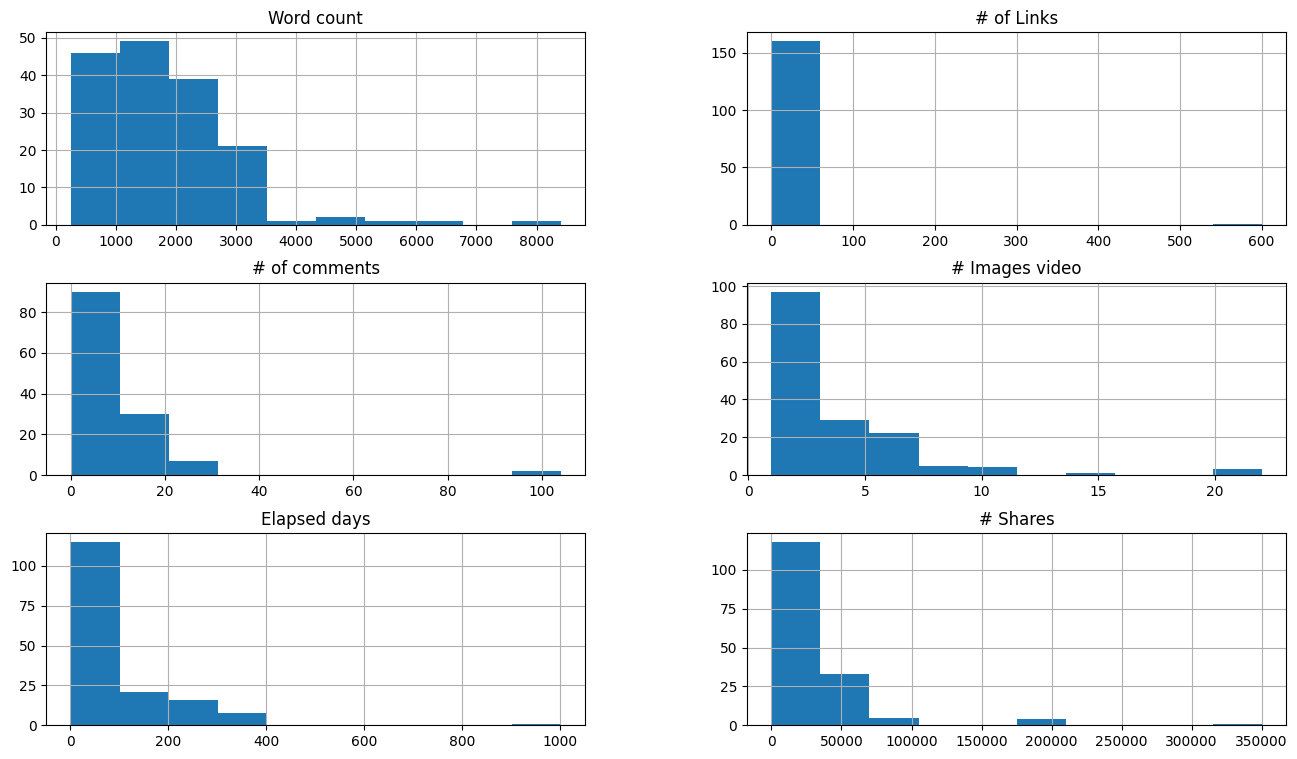

In [6]:
plt.rcParams['figure.figsize'] = (16, 9)
# histograma de variables numericas
variable = ['Word count','# of Links','# of comments','# Images video','Elapsed days','# Shares']
df[variable].hist()
plt.show()

Vamos a DIVIDIR los datos en la zona donde se concentran más los puntos esto es en el eje X: entre 0 y 3.500 y en el eje Y: entre 0 y 80.000

In [7]:
filtered_df = df[(df['Word count'] <= 3300) & (df['# Shares'] <= 70000)]

colores=['orange','blue']
tamanios=[30,60]

f1 = filtered_df['Word count'].values
f2 = filtered_df['# Shares'].values

Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras

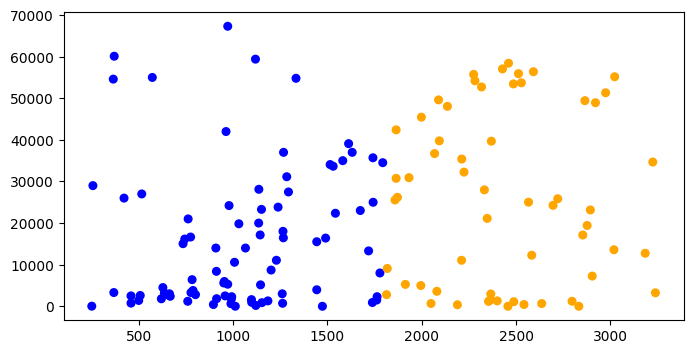

In [8]:
plt.rcParams['figure.figsize'] = (8, 4)
asignar=[]
for index, row in filtered_df.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [9]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dfX =filtered_df[["Word count"]]
# Elegimos dataset de Entrenamiento y Test
X_train = np.array(dfX)
y_train = filtered_df['# Shares'].values

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

In [12]:
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

LinearRegression()

In [13]:
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

In [14]:
y_pred

array([20727.76970687, 15892.35954562, 14646.31154253, 16859.44157787,
       19729.69145563, 11515.69342531, 17783.12890354, 15948.15273979,
       12216.20797431, 13865.20682417, 20039.65364546, 13468.4552212 ,
       18192.27899411, 12185.21175533, 13121.2975686 , 16964.82872241,
       14057.38338186, 14807.49188124, 12538.56865173, 16530.88165665,
       15557.60038061, 17739.73419697, 15817.96862006, 20845.555339  ,
       15576.198112  , 15948.15273979, 12767.9406722 , 12767.9406722 ,
       14776.49566225, 22823.11411007, 11478.49796253, 20857.95382659,
       13958.19548112, 17268.59166843, 15861.36332664, 13815.6128738 ,
       15477.01021125, 16729.25745814, 17752.13268456, 20702.97273168,
       21167.91601642, 24806.87212494, 14032.58640668, 14888.08205059,
       12203.80948672, 13071.70361822, 16078.33685951, 13022.10966785,
       13766.01892343, 17070.21586695, 24577.50010447, 16053.53988433,
       14633.91305493, 16735.45670194, 27267.97191214, 16871.84006546,
      

In [15]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [6.1992438]
Independent term: 
 9928.687013412722
Mean squared error: 335009840.07
Variance score: 0.07


Enronces la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 5,69 y el término independiente “b” es 11200.
Se tiene un Error Cuadrático medio elevado por lo que en realidad este modelo no será muy bueno

In [22]:
# Vamos a predecir cuántos "Shares" vamos a obtener por un artículo con 2.000 palabras, según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil[0]))

22327


Esto quiere decir que con un articulo de 2000 palabras vamos obtejer un total de 22,595 compartidas

*Documentación:*


*   https://www.iartificial.net/regresion-lineal-con-ejemplos-en-python/
*   http://eio.usc.es/eipc1/BASE/BASEMASTER/FORMULARIOS-PHP-DPTO/MATERIALES/Mat_50140116_Regr_%20simple_2011_12.pdf
*   https://www.codificandobits.com/blog/tutorial-regresion-lineal-en-python/



# Ejemplo de Regresión Lineal Simple

Supongamos que queremos predecir el precio de una casa (en miles de dólares) basándonos en su tamaño (en pies cuadrados).


In [23]:
# 1. Importar Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# 2. Crear un DataFrame con datos de ejemplo
data = {'Tamaño': [1500, 1600, 1700, 1500, 1900, 2000, 1800, 2200, 1700, 2400],
        'Precio': [300, 320, 340, 360, 380, 400, 420, 440, 460, 480]}
df = pd.DataFrame(data)

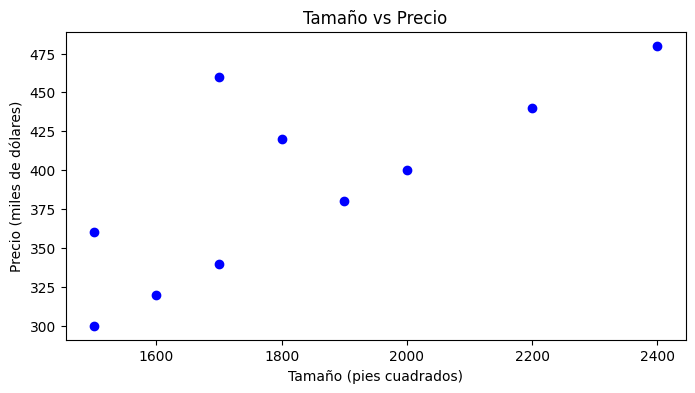

In [25]:
# 3. Visualizar Datos
plt.scatter(df['Tamaño'], df['Precio'], color='blue')
plt.xlabel('Tamaño (pies cuadrados)')
plt.ylabel('Precio (miles de dólares)')
plt.title('Tamaño vs Precio')
plt.show()

In [27]:
# 4. Preparar Datos para el Modelo
X = df[['Tamaño']]  # Variable independiente
y = df['Precio']    # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# 5. Entrenar el Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [29]:
# 6. Realizar Predicciones
y_pred = modelo.predict(X_train)

In [30]:
# 7. Evaluar el Modelo
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')

Error cuadrático medio (MSE): 547.5524475524478
Coeficiente de determinación (R^2): 0.8111888111888111


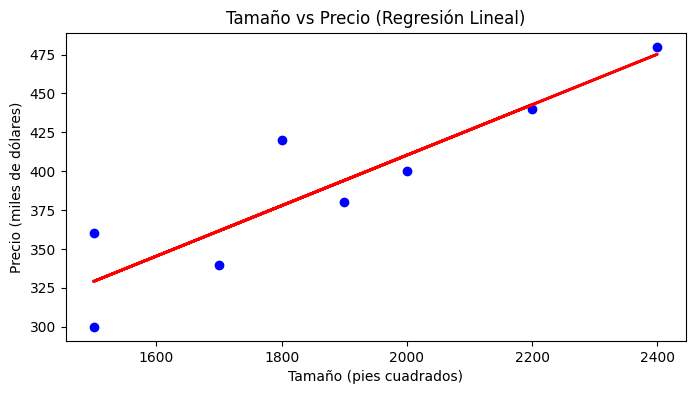

In [31]:
# 8. Visualizar la Línea de Regresión
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_pred, color='red', linewidth=2)
plt.xlabel('Tamaño (pies cuadrados)')
plt.ylabel('Precio (miles de dólares)')
plt.title('Tamaño vs Precio (Regresión Lineal)')
plt.show()

# Ejemplo de Regresión Lineal Lasso y Ridge

In [32]:
from sklearn.linear_model import Lasso, Ridge

In [33]:
# Crear un DataFrame con datos de ejemplo
data = {'Tamaño': [1500, 1600, 1700, 1500, 1900, 2000, 1800, 2200, 1700, 2400],
        'Precio': [300, 320, 340, 360, 380, 400, 420, 440, 460, 480]}
df = pd.DataFrame(data)

In [34]:
# Preparar los datos para el modelo
X = df[['Tamaño']]  # Variable independiente
y = df['Precio']    # Variable dependiente

In [35]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Parámetro de regularización
alpha_value = 1.0

## Modelo Lasso

In [37]:
# Entrenar el modelo Lasso
modelo_lasso = Lasso(alpha=alpha_value)
modelo_lasso.fit(X_train, y_train)

Lasso()

In [38]:
# Realizar predicciones con el modelo Lasso
y_pred_lasso = modelo_lasso.predict(X_train)

In [39]:
# Evaluar el modelo Lasso
mse_lasso = mean_squared_error(y_train, y_pred_lasso)
r2_lasso = r2_score(y_train, y_pred_lasso)
print(f'Lasso - Error cuadrático medio (MSE): {mse_lasso}')
print(f'Lasso - Coeficiente de determinación (R^2): {r2_lasso}')

Lasso - Error cuadrático medio (MSE): 547.5524587412584
Lasso - Coeficiente de determinación (R^2): 0.8111888073306006


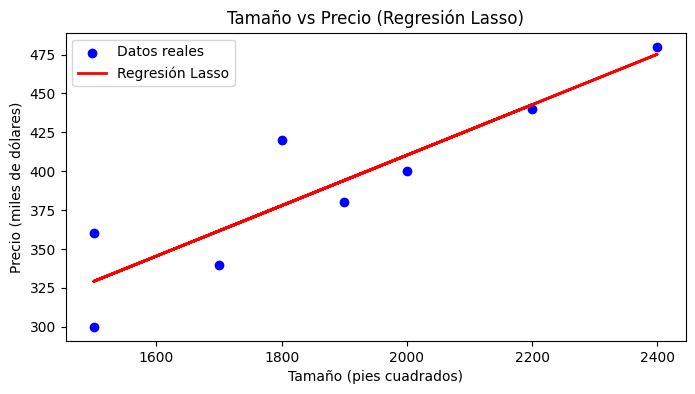

In [40]:
# Visualizar la línea de regresión para Lasso
plt.scatter(X_train, y_train, color='blue', label='Datos reales')
plt.plot(X_train, y_pred_lasso, color='red', linewidth=2, label='Regresión Lasso')
plt.xlabel('Tamaño (pies cuadrados)')
plt.ylabel('Precio (miles de dólares)')
plt.title('Tamaño vs Precio (Regresión Lasso)')
plt.legend()
plt.show()

## Modelo Ridge

In [41]:
# Entrenar el modelo Ridge
modelo_ridge = Ridge(alpha=alpha_value)
modelo_ridge.fit(X_train, y_train)

Ridge()

In [42]:
# Realizar predicciones con el modelo Ridge
y_pred_ridge = modelo_ridge.predict(X_train)

In [ ]:
# Evaluar el modelo Ridge
mse_ridge = mean_squared_error(y_train, y_pred_ridge)
r2_ridge = r2_score(y_train, y_pred_ridge)
print(f'Ridge - Error cuadrático medio (MSE): {mse_ridge}')
print(f'Ridge - Coeficiente de determinación (R^2): {r2_ridge}')

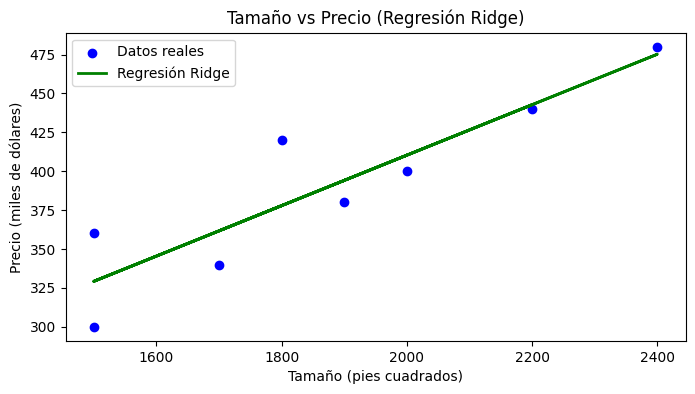

In [43]:
# Visualizar la línea de regresión para Ridge
plt.scatter(X_train, y_train, color='blue', label='Datos reales')
plt.plot(X_train, y_pred_ridge, color='green', linewidth=2, label='Regresión Ridge')
plt.xlabel('Tamaño (pies cuadrados)')
plt.ylabel('Precio (miles de dólares)')
plt.title('Tamaño vs Precio (Regresión Ridge)')
plt.legend()
plt.show()


# Ejemplo de Regresión Lineal Multiple

Ahora, supongamos que queremos predecir el precio de una casa basándonos en su tamaño (en pies cuadrados) y el número de habitaciones.

In [44]:
# 1. Crear Datos de Ejemplo
data = {'Tamaño': [1500, 1600, 1700, 1500, 1900, 2000, 1800, 2200, 1700, 2400],
        'Habitaciones': [3, 3, 3, 4, 4, 4, 5, 5, 5, 5],
        'Precio':  [300, 320, 340, 360, 380, 400, 420, 440, 460, 480]}
df = pd.DataFrame(data)

In [52]:
df.head()

,Tamaño,Habitaciones,Precio
0,1500,3,300
1,1600,3,320
2,1700,3,340
3,1500,4,360
4,1900,4,380


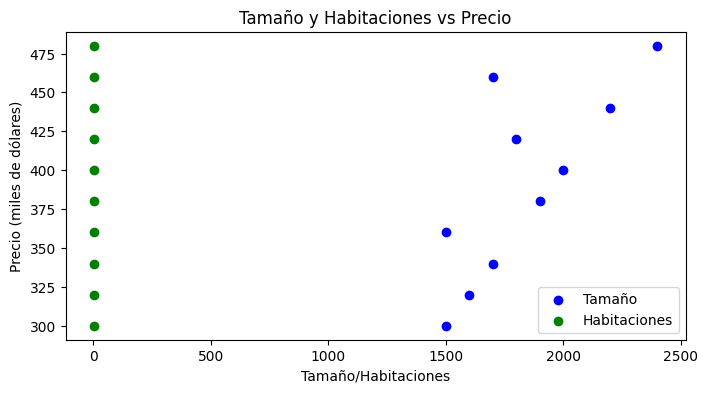

In [45]:
# 2. Visualizar Datos
plt.scatter(df['Tamaño'], df['Precio'], color='blue', label='Tamaño')
plt.scatter(df['Habitaciones'], df['Precio'], color='green', label='Habitaciones')
plt.xlabel('Tamaño/Habitaciones')
plt.ylabel('Precio (miles de dólares)')
plt.title('Tamaño y Habitaciones vs Precio')
plt.legend()
plt.show()

In [46]:
# 3. Preparar Datos para el Modelo
X = df[['Tamaño', 'Habitaciones']]  # Variables independientes
y = df['Precio']                    # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# 4. Entrenar el Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [48]:
# 5. Realizar Predicciones
y_pred = modelo.predict(X_train)

In [49]:
# 6. Evaluar el Modelo
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')

Error cuadrático medio (MSE): 80.9609826589594
Coeficiente de determinación (R^2): 0.9720824197727727


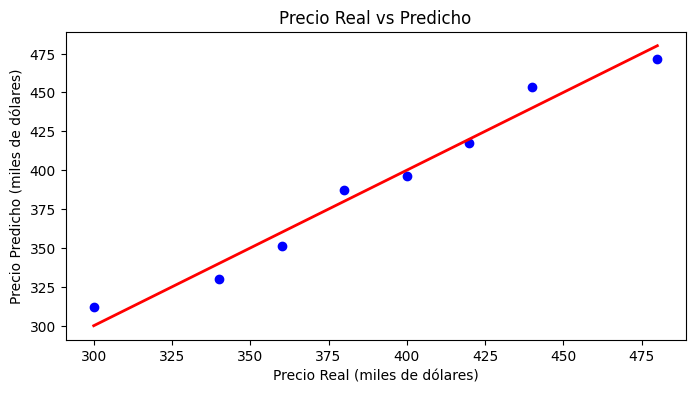

In [50]:
# 7. Visualizar la Comparación entre Valores Reales y Predichos
plt.scatter(y_train, y_pred, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)
plt.xlabel('Precio Real (miles de dólares)')
plt.ylabel('Precio Predicho (miles de dólares)')
plt.title('Precio Real vs Predicho')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


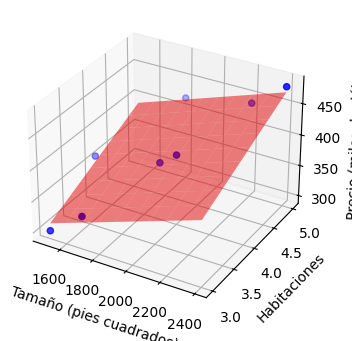

In [51]:
# prompt: crear grafica de las variables el precio real, precio predicho, tamaño y habitaciones donde se vea en un 3D la estimación lineal que se ha hecho para el precio predicho

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear figura y ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos de datos reales
ax.scatter(X_train['Tamaño'], X_train['Habitaciones'], y_train, c='blue', label='Precio Real')

# Crear una malla para la superficie de predicción
x_surf, y_surf = np.meshgrid(np.linspace(X_train['Tamaño'].min(), X_train['Tamaño'].max(), 10),
                           np.linspace(X_train['Habitaciones'].min(), X_train['Habitaciones'].max(), 10))
z_surf = modelo.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

# Graficar la superficie de predicción
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.5, color='red', label='Estimación Lineal')

# Configurar etiquetas y leyenda
ax.set_xlabel('Tamaño (pies cuadrados)')
ax.set_ylabel('Habitaciones')
ax.set_zlabel('Precio (miles de dólares)')
#ax.legend()

# Mostrar la gráfica
plt.show()
